In [ ]:
#| hide
from nanograd.core import *

# nanograd
## Welcome to nanograd :)
> This is a mock library implementing [`micrograd`](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ) by [Andrej Karpathy](https://karpathy.ai/). 

## Install

```
git clone https://github.com/vempaliakhil96/nanograd.git && cd nanaograd
pip install .
```

## How to use

In [ ]:
from nanograd.nn import MLP, plot_preds
import numpy as np
import math

## Let's generate a random dataset
Generating few samples of a sine wave

In [ ]:

samples = [(i, 1 if math.sin(i)>0 else -1) for i in np.arange(-5, 5, 0.1)]

xs, ys = zip(*samples)
xs, ys = list(xs), list(ys)   

## Initialise MLP

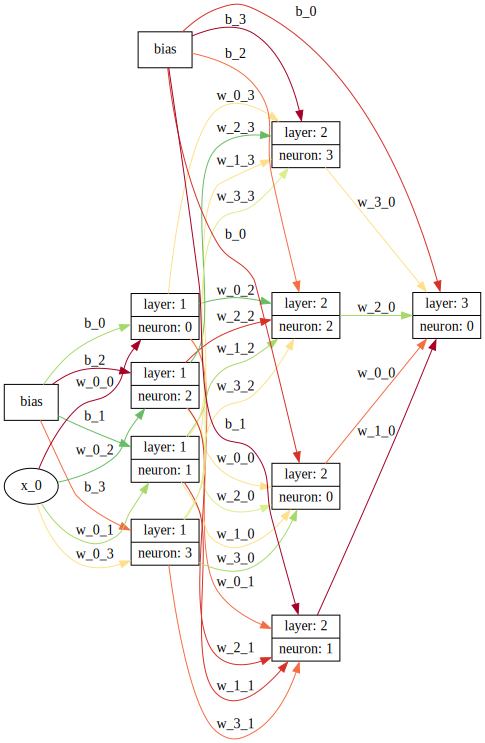

In [ ]:
model = MLP(1, [4, 4, 1])
model.draw_nn()

### Perdictions before training

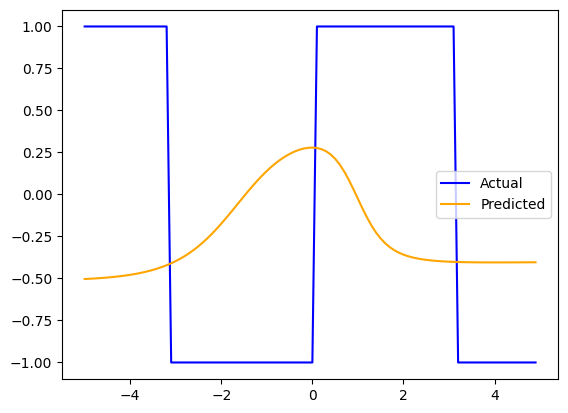

In [ ]:
y_preds = [model([x])[0] for x in xs]
plot_preds(xs, ys, [i.data for i in y_preds])

## Training loop

In [ ]:
def calc_loss_and_accuracy(model, X, Y):
    y_preds = [model([x])[0] for x in X]
    loss = sum([(y_preds[i] - Y[i])**2 for i in range(len(Y))])/len(Y) # MSE
    y_preds = [1 if y_preds[i].data > 0.5 else 0 for i in range(len(Y))]
    accuracy = sum([1 if y_preds[i] == Y[i] else 0 for i in range(len(Y))])/len(Y)
    return loss, accuracy
calc_loss_and_accuracy(model, xs, ys)

(Value(data=1.23e+00, grad=0.00e+00, label=), 0.0)

In [ ]:
for i in range(1000):
    
    # forward pass
    loss, accuracy = calc_loss_and_accuracy(model, xs, ys)
    
    
    # backward pass
    model.zero_grad()
    loss.backward()

    # update weights
    for p in model.parameters():
        p.data += -0.1 * p.grad
    
    if i % 100 == 0:
        print(f"Loss at epoch {i:.3f}: {loss.data:.3f} | Accuracy: {accuracy:.3f}")

Loss at epoch 0.000: 1.231 | Accuracy: 0.000
Loss at epoch 100.000: 0.554 | Accuracy: 0.220
Loss at epoch 200.000: 0.260 | Accuracy: 0.370
Loss at epoch 300.000: 0.147 | Accuracy: 0.420
Loss at epoch 400.000: 0.117 | Accuracy: 0.440
Loss at epoch 500.000: 0.099 | Accuracy: 0.450
Loss at epoch 600.000: 0.087 | Accuracy: 0.450
Loss at epoch 700.000: 0.079 | Accuracy: 0.470
Loss at epoch 800.000: 0.072 | Accuracy: 0.470
Loss at epoch 900.000: 0.067 | Accuracy: 0.470


## Predictions

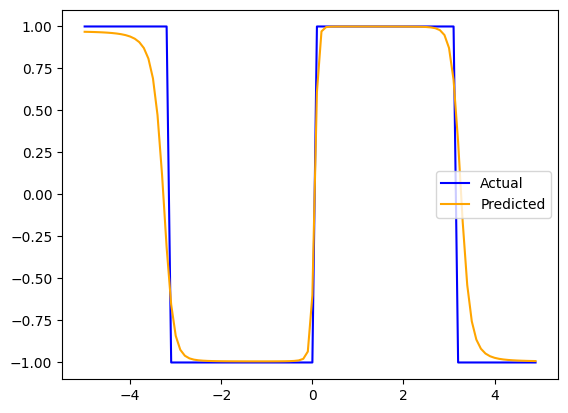

In [ ]:
y_preds = [model([x])[0] for x in xs]
plot_preds(xs, ys, [i.data for i in y_preds])

Notice the strength of the connections has changed. 

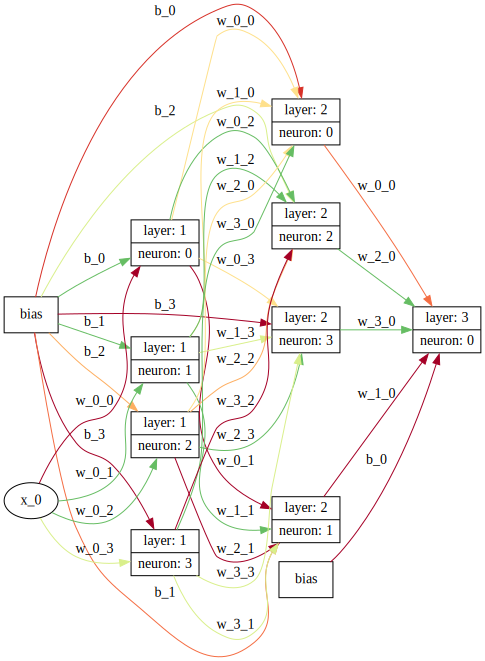

In [ ]:
model.draw_nn()